In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
num_obj = 656

with open('LearnRes_6_norm.txt', mode='r', encoding='cp1252') as f: 
    text = f.readlines()

arr = np.zeros((len(text), num_obj))

arr.shape

(168, 656)

In [3]:
k = [266, 350, 446, 537, 592, 655]

s = [k[num] - k[num-1] for num in range(1, len(k)) ]

s =  [k[0] + 1] + s


y = []
y_size = []
for num, val in enumerate(s):
    for j in range(val):
        y.append(num)
        y_size.append(1 / val)
y = np.array(y)

In [4]:
for line_num, line in enumerate(text):
    indices = [int(ind) - 1 for ind in line.split(": ")[1].replace("<b>", "").replace("</b>", "").split(" ") if ind.isdigit()]
    arr[line_num, indices] = 1

считаем количество логических закономерностей в каждом классе

In [5]:
norm_const = []
for num, val in enumerate(s):
    for j in range(val):
        norm_const.append(val+1)

In [6]:
norm = np.sum(arr, axis=1)

In [7]:
norm

array([ 228.,  182.,   59.,  225.,  129.,  227.,  225.,  215.,  226.,
        226.,  227.,  185.,  166.,  226.,  229.,  216.,  224.,  227.,
        168.,  229.,  225.,  226.,  229.,  220.,  216.,  228.,  160.,
        227.,   67.,   67.,   67.,   50.,   18.,   67.,   38.,   56.,
         67.,   67.,   67.,   67.,   49.,   67.,   67.,   67.,   67.,
         67.,   77.,   67.,   67.,   17.,   67.,   38.,   67.,   67.,
         16.,   78.,   82.,   81.,   81.,   81.,   81.,   81.,   81.,
         77.,   81.,   75.,   81.,   81.,   82.,   82.,   81.,   81.,
         81.,   81.,   81.,   55.,   81.,   81.,   79.,   82.,   81.,
         76.,   82.,   82.,   65.,   11.,   67.,   67.,   68.,   68.,
         68.,   68.,   21.,   63.,   67.,   67.,   67.,   67.,   68.,
         60.,   64.,   24.,   67.,   50.,   62.,   68.,   68.,   67.,
         67.,   58.,   24.,   68.,   35.,   10.,   37.,   35.,   30.,
         14.,   24.,   30.,   35.,   24.,   25.,   27.,   29.,   10.,
         11.,   34.,

In [8]:
X = np.loadtxt("matrix.txt")
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X.shape

(656, 88)

In [10]:
from scipy.special import expit

In [11]:
G = np.sum((norm[:, np.newaxis] * arr / norm_const), axis=0)

ind_sorted = np.argsort(-G)
sorted_G = G[ind_sorted]

(array([ 107.,   31.,   21.,   33.,   32.,    3.,   21.,  106.,  115.,  187.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

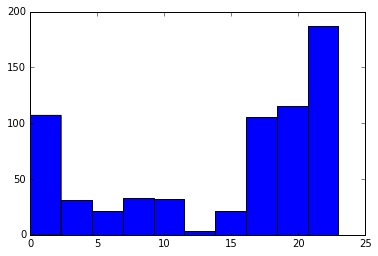

In [58]:
plt.hist(G)

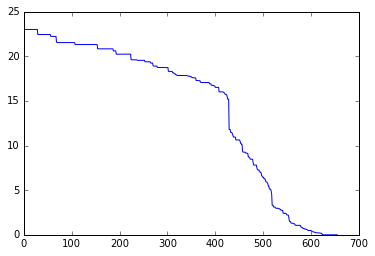

In [59]:
plt.plot(G[ind_sorted])

In [15]:
# shuffle = np.arange(np.size(y))
# np.random.shuffle(shuffle)

# X = X[shuffle]

# y = np.array(y)[shuffle]

In [17]:
# def learn_2(X, y, reg, mode="test"):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#     reg.fit(X_train, y_train)
#     if mode == "train":
#         pred = reg.predict(X_train)
#         return f1_score(y_train, pred, average="weighted")
#     else:
#         pred = reg.predict(X_test)
#         return f1_score(y_test, pred, average="weighted")



In [18]:
# def test_version_2(X, y, model, mode, coeff = 0.7):
#     to_del_X = X.copy()
#     to_del_X = to_del_X.tolist()
#     to_del_y = y.copy()
#     to_del_y = to_del_y.tolist()
#     num_del = []
#     for i in range(1, len(k)):
#         num = int(s[i] * (1-coeff))
#         a = sorted(ind[k_new[i-1]:k_new[i]])
#         num_del += a[:num]

        
#     num_del = sorted(num_del, key=lambda x: -x)
#     for j in num_del:
#         del to_del_X[j]
#         del to_del_y[j]




#     return learn_2(to_del_X, to_del_y, model, mode)

In [77]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier()
}

In [20]:
# for name, model in models.items():
#     plt.ylim(0, 1)
#     plt.xlim(0.1, 1)
#     print (name)
#     x_arr = []
#     y_arr = []
#     for i in np.arange(0.1, 1.1, 0.1):
#         x_arr.append(i)
#         y_arr.append(test_version_2(X, y, model, "train", i))
#     plt.figure()
#     plt.title(name)
#     plt.xlabel('Part of train set')
#     plt.ylabel('F-measure')
#     y_max = max(y_arr)
#     x_max = x_arr[y_arr.index(y_max)]
#     plt.annotate('max', xy=(x_max, y_max),
#                 arrowprops=dict(facecolor='black', shrink=0.01))
#     plt.plot(x_arr, y_arr, label="train", linewidth=2.0)
#     plt.ylim(0, 1)
#     plt.xlim(0.1, 1)
#     x_arr = []
#     y_arr = []
#     for i in np.arange(0.1, 1.1, 0.1):
#         x_arr.append(i)
#         y_arr.append(test_version_2(X, y, model, "test", i))
        
#     y_max = max(y_arr)
#     x_max = x_arr[y_arr.index(y_max)]
#     plt.annotate('max', xy=(x_max, y_max),
#                 arrowprops=dict(facecolor='black', shrink=0.01))
#     plt.plot(x_arr, y_arr, label="test", linewidth=2.0)
#     plt.legend(loc=6)

In [76]:
def cross_val(X, y, X_err, y_err, model):
    num_groups = 14
    X = np.array(X)
    
    n = X.shape[0]
    
    coeff = X_err.shape[0] / n
    
    size_X = n // num_groups
    size_err = X_err.shape[0] // num_groups

    
    groups = []
    groups_y = []
#     groups_err = []
#     groups_err_y = []
    
    for i in range(num_groups-1):
        groups.append(X[i * size_X: (i + 1) * size_X - 1])
        groups_y.append(np.array(y[i * size_X: (i + 1) * size_X - 1]))
#         groups_err.append(X_err[i * size_err: (i + 1) * size_err - 1])
#         groups_err_y.append(np.array(y_err[i * size_err: (i + 1) * size_err - 1]))     

    i = num_groups-1
    groups.append(X[i * size_X:])
    groups_y.append(np.array(y[i * size_X:]))
#     print (list(map(len, groups)))
    
    score = []
    for i in combinations(np.arange(num_groups), num_groups-1):
        
        X_train = groups[i[0]]
        y_train = groups_y[i[0]]
        
        a = set()
        b = set(range(1, num_groups + 1))
        
        for j in range(1, num_groups - 1):
            X_train = np.concatenate((X_train, groups[i[j]]))
            y_train = np.append(y_train, groups_y[i[j]])
            
        try:
            model.fit(X_train, y_train)
        except ValueError:
            return 0
        test = list(a ^ b)[0]
        
        X_test = groups[test]
        y_test = np.array(groups_y[test])
        
        try:
            pred = model.predict(X_test)
        except ValueError:
            return 0
        
        try:
            pred_err = model.predict(X_err)
        except ValueError:
            return 0
            
        try:
            acc_err = accuracy_score(pred_err, y_err) * coeff
        except TypeError:
            print ("here")
            acc_err = 0
        
        score.append(accuracy_score(pred, y_test) * (1 - coeff) + acc_err)
        
    return np.array(score).mean()      


In [66]:
a = [[1, 2], [3, 4], [2, 1, 1]]
list(map(len, a))

[2, 2, 3]

In [25]:
# def learn(X, y, reg, test_X, test_y, mode="test"):

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     X_test = np.array(X_test)
#     test_X = np.array(test_X)
#     reg.fit(X_train, y_train)

#     if mode == "train":
#         try:
#             pred = reg.predict(X_train)
#             return accuracy_score(y_train, pred)
#         except:
#             return 1
#     else:
#         try:
#             all_obj = X_test.shape[0] + test_X.shape[0]
#             coeff_1 = 1 - float(X_test.shape[0]) / float(all_obj)
#             coeff_2 = float(test_X.shape[0]) / float(all_obj)

#             pred = reg.predict(X_test)
#             pred_test = reg.predict(test_X)
#             try:
#                 two = accuracy_score(test_y, pred_test) * coeff_2
#             except:
#                 return 0
#             return accuracy_score(y_test, pred) * coeff_1 + two
#         except:
#             print("exception")
#             return 1

In [52]:
def test(X, y, model):
    print(X.shape, y.shape)
    result = [cross_val(X, y, np.array([[]]), np.array([]), model)]


    for i in range(1, len(ind_sorted)-1):

        to_del_X = X.copy()
        to_del_X = to_del_X.tolist()
        to_del_y = y.copy()
        to_del_y = to_del_y.tolist()
        
        a = sorted(ind_sorted[:i], key=lambda x: -x)
        
        X_err = np.zeros((len(a), X.shape[1]))
        y_err = np.zeros((len(a)))
        
        for num, j in enumerate(a):
            X_err[num, :] = to_del_X[j]
            y_err[num] = to_del_y[j]
            del to_del_X[j]
            del to_del_y[j]
        
        result.append(cross_val(to_del_X, to_del_y, X_err, y_err, model))
    
    return np.array(result)

In [33]:
shuffle = np.arange(np.size(y))
np.random.shuffle(shuffle)
X = X[shuffle]
y = np.array(y)[shuffle]

In [ ]:
 for name, model in models.items():
    print (name)
    plt.figure(figsize=(7, 4))
    
    plt.xlabel('Number of deleted object')
    plt.ylabel('F-measure')
    plt.title(name)
    plt.ylim(0, 1)
    
    res = test(X, y, model)
    print (res.shape)
    plt.plot(res)
    plt.legend()

Random Forest Classifier
(656, 88) (656,)
